## K-Means Clustering with Elbow Method


In this notebook, we will implement K-Means clustering on the Iris dataset and use the Elbow Method to determine the optimal number of clusters.


In [ ]:
!pip install scikit-learn pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load Iris dataset (without labels)
data = load_iris()
X = data.data

# Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


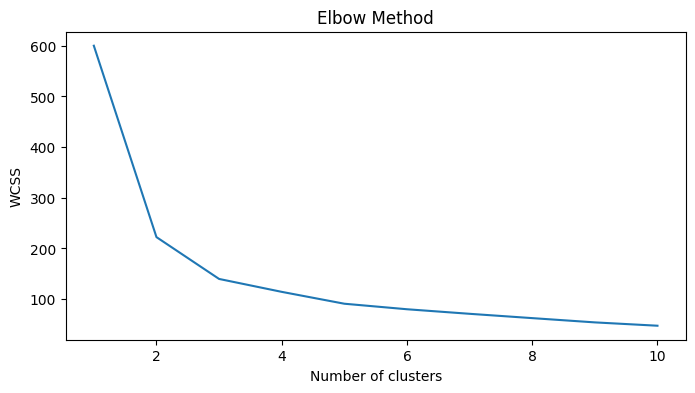

In [ ]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The Elbow'
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


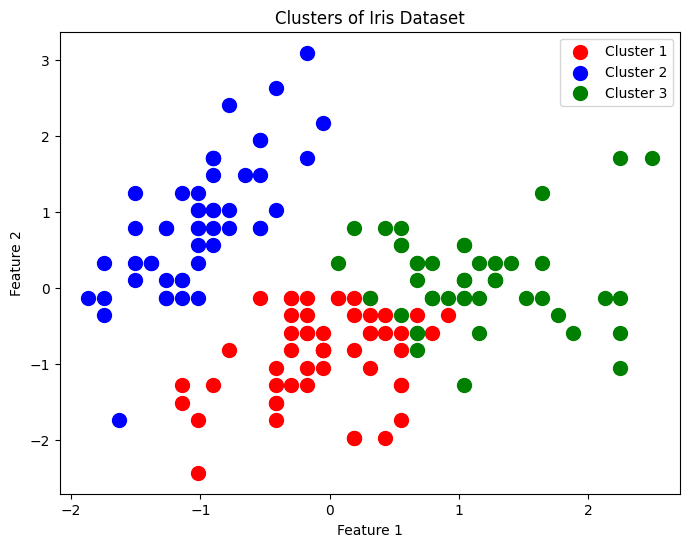

In [ ]:
# Applying K-Means to the dataset with the optimal number of clusters
optimal_clusters = 3  # Assuming 3 is the optimal number based on the Elbow Method
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans_optimal.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
